# Retail Sales Forecast - Part 4 of 5

## Seasonal ARIMA

### Notebook Setup

In [1]:
%matplotlib inline

from __future__ import division
from __future__ import print_function

# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

# Import Pandas, Matplotlib, etc
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt

from pyramid.arima import auto_arima

plt.style.use('ggplot')

### Load & Transform for SARIMA

Auto SARIMA just needs a data column and the value we're trying to forecast

In [2]:
df = pd.read_excel('../data/daily-sales.xlsx', index_col='date', parse_dates=True)
df.drop(['year', 'day', 'week', 'avg_sale', 'month', 'customers', 'is_open', 'is_holiday'], axis='columns', inplace=True)
df.columns = ['y']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2017-11-17 to 2018-11-10
Data columns (total 1 columns):
y    359 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


In [3]:
df.head(10)

,y
date,
2017-11-17,348.63
2017-11-18,1334.38
2017-11-19,0.00
2017-11-20,512.08
2017-11-21,0.00
2017-11-22,1132.31
2017-11-23,0.00
2017-11-24,2529.53
2017-11-25,1545.76


In [4]:
df['y'].describe()

count     359.000000
mean      711.627521
std       630.596589
min         0.000000
25%       240.815000
50%       558.150000
75%      1059.765000
max      3493.050000
Name: y, dtype: float64

### Auto Fit SARIMA

Be aware that this will take a while... You'll see a "Total fit time" message when complete.

In [5]:
model = auto_arima(
    df, 
    start_p=1, start_q=1,
    max_p=7, max_q=7, 
    m=12,
    start_P=1, 
    seasonal=True,
    d=1, D=1, 
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5493.430, BIC=5516.509, Fit time=3.715 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5929.711, BIC=5937.404, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5732.487, BIC=5747.873, Fit time=1.028 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5489.984, BIC=5505.370, Fit time=1.700 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5491.929, BIC=5511.161, Fit time=2.971 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5684.827, BIC=5696.366, Fit time=0.183 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5491.951, BIC=5511.183, Fit time=3.097 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5486.335, BIC=5509.414, Fit time=5.901 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5488.525, BIC=5515.450, Fit time=8.143 seconds
Fit ARIMA: order=(0, 1, 0) s

### Instantiate the Model

In [6]:
df_train = df[:-60]
df_test = df[-60:]

model.fit(df_train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [7]:
yhat = model.predict(60)
df_test['yhat'] = yhat
df_test.head(10)

,y,yhat
date,,
2018-09-12,912.07,972.594147
2018-09-13,553.08,533.374278
2018-09-14,556.93,594.984332
2018-09-15,2096.30,780.366878
2018-09-16,0.00,755.678774
2018-09-17,596.11,533.203273
2018-09-18,843.27,772.068683
2018-09-19,992.96,760.132154
2018-09-20,853.17,935.619901


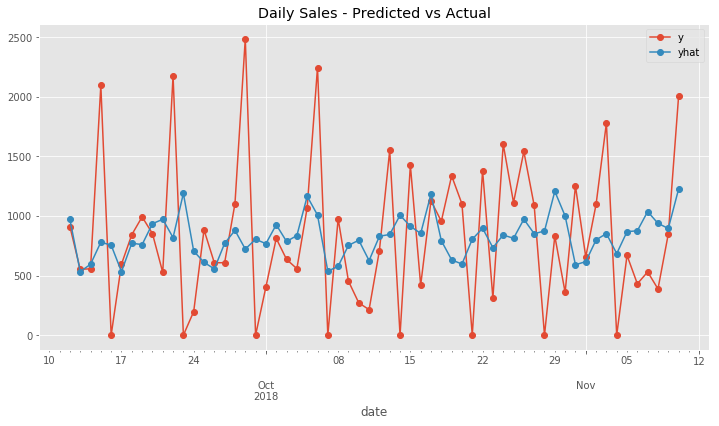

In [8]:
df_test.plot(figsize=(12, 6), marker='o')
plt.title('Daily Sales - Predicted vs Actual')
plt.show()